In [1]:
import pandas as pd
import pickle as pk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('runs/rewards/rewards_11.pk', 'rb') as f:
    rewards = pk.load(f)

<Figure size 600x400 with 0 Axes>

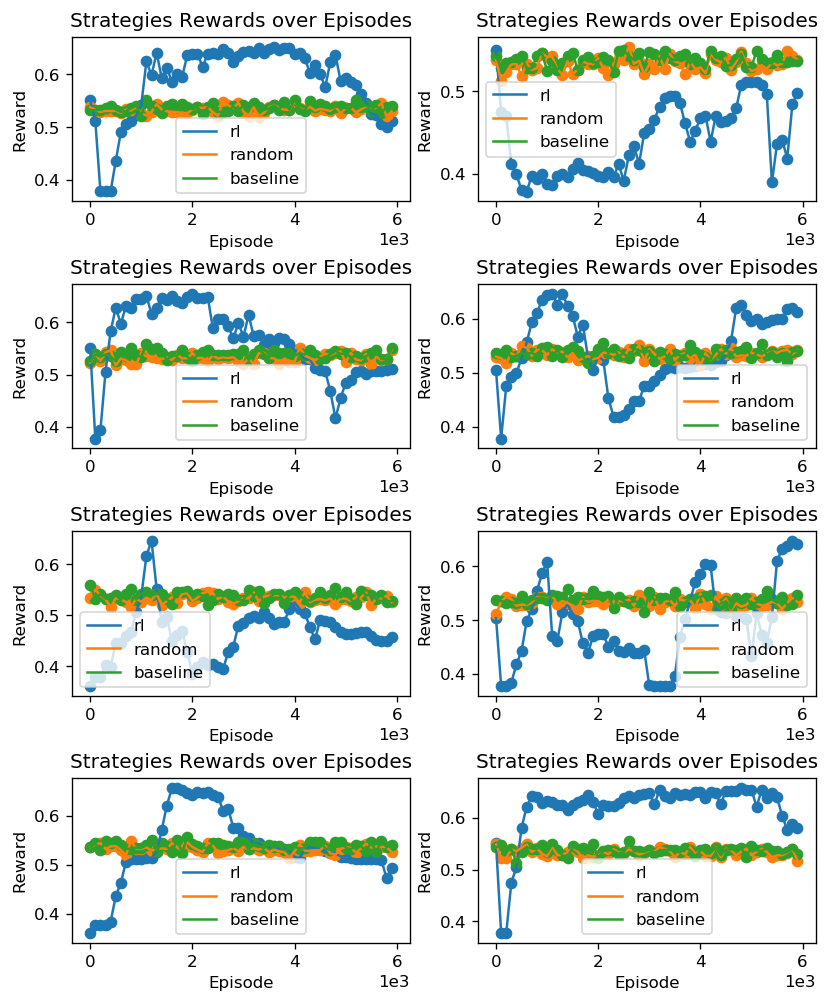

In [3]:
fig = plt.figure(dpi=100)

rows = 4
cols = 2
fig, ax = plt.subplots(rows,cols, dpi=120, figsize=(8,10))

for row_ in range(rows):
    for col_ in range(cols):
        i = cols*row_+col_
        with open(f'runs/rewards/rewards_{i}.pk', 'rb') as f:
            rewards = pk.load(f)
        for k in ['rl', 'random', 'baseline']:
            ax[row_,col_].plot(rewards['episode'], rewards[k], label=k)
            ax[row_,col_].scatter(rewards['episode'], rewards[k])
        ax[row_,col_].legend()
        ax[row_,col_].set_xlabel('Episode')
        ax[row_,col_].set_ylabel('Reward')
        ax[row_,col_].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
        ax[row_,col_].set_title('Strategies Rewards over Episodes')
plt.subplots_adjust(hspace=0.5)
plt.show()

In [4]:
import glob
import pandas as pd
import numpy as np
import pickle as pk
import matplotlib.pyplot as plt

rewards = {'rl':{}, 'baseline':{}, 'random':{}}
paths = glob.glob('runs/rewards/*.pk')
for path_ in paths:
    name = 'sim_' + path_.split('rewards_')[-1].split('.pk')[0]
    with open(path_, 'rb') as f:
        df = pd.DataFrame(pk.load(f))
        for k in ['rl', 'baseline', 'random']:
            rewards[k].update({name: df[k]})

rewards = {k:pd.DataFrame(v) for k, v in rewards.items()}

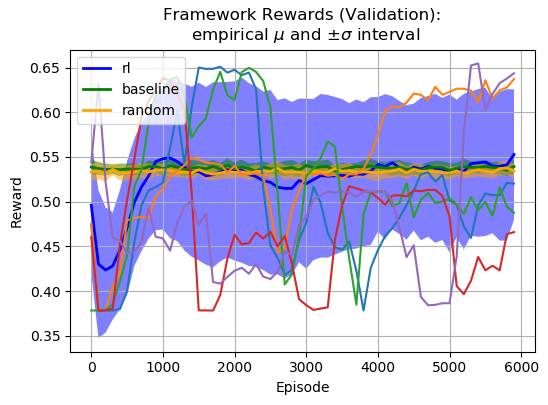

In [9]:
t = np.arange(60)*100
fig, ax = plt.subplots(1, dpi=100)
strats = list(zip(['rl', 'baseline', 'random'], ['blue', 'green', 'orange']))

for strategy, color in strats:
    mu = rewards[strategy].mean(axis=1)
    sigma = rewards[strategy].std(axis=1)
    ax.plot(t, mu, lw=2, label=strategy, color=color)
    ax.fill_between(t, mu+sigma, mu-sigma, facecolor=color, alpha=0.5)

for i in range(15,20):
    ax.plot(t, rewards['rl'][f'sim_{i}'].values)
    
ax.set_title('Framework Rewards (Validation):\n empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='upper left')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.grid()
fig.savefig('results.png', dpi=120)

In [6]:
rewards['rl'].shape

(60, 24)

In [7]:
rewards['rl']

,sim_0,sim_11,sim_15,sim_4,sim_21,sim_14,sim_5,sim_20,sim_1,sim_10,...,sim_17,sim_23,sim_6,sim_2,sim_13,sim_3,sim_12,sim_16,sim_22,sim_7
0,0.550838,0.550838,0.475239,0.361962,0.549122,0.460555,0.504024,0.366100,0.550838,0.505055,...,0.378204,0.377893,0.361962,0.550838,0.550862,0.505055,0.550838,0.475239,0.550838,0.550838
1,0.511720,0.378204,0.378204,0.378204,0.510903,0.378204,0.378204,0.378204,0.475612,0.378204,...,0.378204,0.378204,0.378204,0.378204,0.515642,0.378204,0.619059,0.379528,0.452835,0.378204
2,0.378204,0.378204,0.378204,0.378204,0.497168,0.378204,0.378204,0.378204,0.469756,0.378204,...,0.378612,0.378204,0.378204,0.394098,0.498648,0.475352,0.633407,0.378204,0.510517,0.378204
3,0.378204,0.378204,0.378204,0.403270,0.478502,0.378204,0.383935,0.402259,0.411156,0.416181,...,0.385282,0.378204,0.378204,0.505829,0.426951,0.493090,0.602199,0.406142,0.513239,0.474993
4,0.378612,0.378204,0.379838,0.398641,0.496868,0.378204,0.418088,0.481088,0.399359,0.467677,...,0.410872,0.384306,0.384715,0.582947,0.383613,0.500245,0.599623,0.419301,0.523554,0.505255
5,0.436123,0.388800,0.399928,0.445540,0.527558,0.380816,0.442820,0.510337,0.379627,0.501087,...,0.439825,0.392377,0.436482,0.627694,0.378204,0.526797,0.615860,0.479065,0.533967,0.580285
6,0.490996,0.486690,0.454531,0.444591,0.540668,0.410306,0.498859,0.572074,0.378204,0.510606,...,0.516521,0.430516,0.463659,0.597129,0.378204,0.556555,0.638575,0.481557,0.544360,0.621818
7,0.506962,0.502671,0.495846,0.459125,0.561185,0.431566,0.520026,0.597995,0.397502,0.511411,...,0.535496,0.442833,0.506298,0.630935,0.404149,0.593843,0.619427,0.483247,0.544288,0.641527
8,0.512363,0.512337,0.512628,0.466886,0.558190,0.421874,0.553763,0.603707,0.393739,0.533776,...,0.588154,0.470375,0.511720,0.628022,0.492669,0.610725,0.626289,0.481618,0.541478,0.641135
9,0.522643,0.546317,0.516278,0.506497,0.573126,0.454934,0.587340,0.635559,0.399631,0.596748,...,0.621807,0.456722,0.511720,0.645182,0.505865,0.635299,0.639820,0.505777,0.580405,0.628371
